# Section 4: Yelp Data Challenge - Restaurant Recommender

Yiting Luo | Data Science Applied Research - 4

May 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

/Users/luoyiting/anaconda/envs/gl-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('dataset/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g


## 1. Clean data and get rating data 

#### Select relevant columns in the original dataframe

In [4]:
# Get business_id, user_id, stars for recommender

df_stars = df[['business_id', 'user_id', 'stars']]

In [5]:
df_stars['stars'].value_counts()

5    239295
4    110642
1     65552
3     57420
2     42843
Name: stars, dtype: int64

In [6]:
df_stars['business_id'].nunique() # number of unique business_id

4832

In [7]:
df_stars['user_id'].nunique()

227241

In [8]:
df_user_counts = df_stars['user_id'].value_counts()
df_user_counts.head()

bLbSNkLggFnqwNNzzq-Ijw    748
JaqcCU3nxReTW2cBLHounA    330
PKEzKWv_FktMm2mGPjwd0Q    276
B1829_hxXSEpDPEDJtYeIw    244
U4INQZOPSUaj8hMjLlZ3KA    232
Name: user_id, dtype: int64

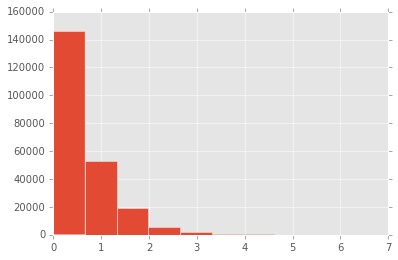

In [9]:
# display log histogram
df_user_counts.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender

In [10]:
# how many users only comments once
df_user_counts[df_user_counts == 1].sum()

145721

In [11]:
# user comment over 5 times
df_users = df_user_counts[df_user_counts >5]

In [12]:
# count users comment over 5 times as active user
df_users.count()

14675

In [13]:
# sum of all comments
df_users.sum()

187598

In [14]:
# display active user id
df_users.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'JaqcCU3nxReTW2cBLHounA',
       u'PKEzKWv_FktMm2mGPjwd0Q', u'B1829_hxXSEpDPEDJtYeIw',
       u'U4INQZOPSUaj8hMjLlZ3KA', u'3nIuSCZk5f_2WWYMLN7h3w',
       u'qPVtjjp8sNQ32p9860SR9Q', u'OXSJCjKtvZPf-YPDCXcWZg',
       u'JYcCYNWs8Ul6ewG5kCYW4Q', u'fVILhIglx6RNOXQba5t4kQ',
       ...
       u'dqdTYDRYyo1CPfkQzQmSRw', u'1FdoUP8a1Q54XPduwUouYA',
       u'z044R1luJTuVtzUGUA9d-A', u'FQsbJx12jvFYxzKy6RdPSw',
       u'XC6xHcptE6RB4f7gu692-A', u'0GTanD35lGadNgiDp_a8cQ',
       u'ezIORV7xsOnbfyGAEaQCag', u'WUE6G4OdTkIdrhqK0blrOg',
       u'u53sKuzUuiV1xH1QzKmb6w', u'ItSmZzoGfoJ_MOdKI4qkBQ'],
      dtype='object', length=14675)

In [15]:
# reader dataframe
df_stars_cleaned = df_stars.set_index('user_id').ix[df_users.index].reset_index()

print(df_stars.head())
print(df_stars_cleaned.head())

              business_id                 user_id  stars
0  --9e1ONYQuAa-CB_Rrw7Tw  oFyOUOeGTRZhFPF9uTqrTQ      5
1  --9e1ONYQuAa-CB_Rrw7Tw  2aeNFntqY2QDZLADNo8iQQ      4
2  --9e1ONYQuAa-CB_Rrw7Tw  gmPP4YFrgYsYQqPYokMgFA      5
3  --9e1ONYQuAa-CB_Rrw7Tw  aVOGlN9fZ-BXcbtj6dbf0g      5
4  --9e1ONYQuAa-CB_Rrw7Tw  KC8H7qTZVPIEnanw9fG43g      5
                  user_id             business_id  stars
0  bLbSNkLggFnqwNNzzq-Ijw  -BS4aZAQm9u41YnB9MUASA      4
1  bLbSNkLggFnqwNNzzq-Ijw  -C8sSrFqaCxp51pyo-fQLQ      4
2  bLbSNkLggFnqwNNzzq-Ijw  -CQokjildrY7UZezXCdEBw      5
3  bLbSNkLggFnqwNNzzq-Ijw  -FcZY7a7qgxTUlTvwuyJnQ      3
4  bLbSNkLggFnqwNNzzq-Ijw  -IWsoxH7mLJTTpU5MmWY4w      4


#### Create utility matrix from records

In [16]:
df_utility = pd.pivot_table(data = df_stars_cleaned,
                           values ='stars', # fill with stars
                           index = 'user_id', # rows
                           columns = 'business_id', #columns
                           fill_value = 0 # fill missings
                           )

In [17]:
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1m9o3vGRA8IBPNvNqKLmA,-1vfRrlnNnNJ5boOVghMPA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-BS4aZAQm9u41YnB9MUASA,-Bf8BQ3yMk8U2f45r2DRKw,...,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zrQ1zKWC-W2PCvwjBururQ,zsQk990PubOHjr1YcLkQFw,zt9RLUIU32fZYOBh2L0NNQ,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
--LUapetRSkZpFZ2d-MXLQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--RlSfc-QmcHFGHyX6aVjA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
-00kdEIhCt-ODaV4BS-EAg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-05XqtNjcBq19vh2CVJN8g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# get the list of user id by checking out the index of the utility matrix
user_id_list = df_utility.index
user_id_list.shape

(14675,)

In [19]:
# get the list of item id by checking out the columns of the utility matrix
item_id_list = df_utility.columns
item_id_list.shape

(4558,)

## 2. Item-Item similarity recommender

In [20]:
import graphlab

In [23]:
sf_stars = graphlab.SFrame(df_stars)
sf_stars

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1525723753.log


This non-commercial license of GraphLab Create for academic use is assigned to luoyiting68@hotmail.com and will expire on May 08, 2019.


business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,oFyOUOeGTRZhFPF9uTqrTQ,5
--9e1ONYQuAa-CB_Rrw7Tw,2aeNFntqY2QDZLADNo8iQQ,4
--9e1ONYQuAa-CB_Rrw7Tw,gmPP4YFrgYsYQqPYokMgFA,5
--9e1ONYQuAa-CB_Rrw7Tw,aVOGlN9fZ-BXcbtj6dbf0g,5
--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
--9e1ONYQuAa-CB_Rrw7Tw,3RTesI_MAwct13LWm4rhLw,4
--9e1ONYQuAa-CB_Rrw7Tw,EAOt1UQhJD0GG3l_jv7rWA,5
--9e1ONYQuAa-CB_Rrw7Tw,C6kw0Rny7jZAGjTj0MWA3Q,5
--9e1ONYQuAa-CB_Rrw7Tw,tTifjrXlRrUme-4c0UW9Bw,5
--9e1ONYQuAa-CB_Rrw7Tw,OtKA03ALQQ1CBhtaJod_Jw,2


In [24]:
# item item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars, 
                                                                        user_id = 'user_id',
                                                                       item_id = 'business_id',
                                                                       target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 515752 observations with 227241 users and 4832 items.

Data prepared in: 0.931662s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 7.459ms                        | 3.5        |

| 86.608ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 174.748ms                           | 0                | 0               |

| 638.675ms                           | 100              | 4832            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.72294s

In [25]:
item_item_rec_result = item_item_rec.recommend(k = 3, verbose = False)

In [26]:
item_item_rec_result

user_id,business_id,score,rank
oFyOUOeGTRZhFPF9uTqrTQ,BhueLLvA0k9G1Lr0WeZX9w,0.0054555649453,1
oFyOUOeGTRZhFPF9uTqrTQ,4mb32UmQULqg7IMck28vog,0.00528274064368,2
oFyOUOeGTRZhFPF9uTqrTQ,6fz0hnNIVpLF5v2NqJfA9w,0.0052772303845,3
2aeNFntqY2QDZLADNo8iQQ,rcaPajgKOJC2vo_l3xa42A,0.0165879130363,1
2aeNFntqY2QDZLADNo8iQQ,faPVqws-x-5k2CQKDNtHxw,0.016526311636,2
2aeNFntqY2QDZLADNo8iQQ,KXITXbKuE60WSUDs7NZVLQ,0.0158300697803,3
gmPP4YFrgYsYQqPYokMgFA,rcaPajgKOJC2vo_l3xa42A,0.0144976079464,1
gmPP4YFrgYsYQqPYokMgFA,faPVqws-x-5k2CQKDNtHxw,0.0140542984009,2
gmPP4YFrgYsYQqPYokMgFA,XZbuPXdyA0ZtTu3AzqtQhg,0.0136348605156,3
aVOGlN9fZ-BXcbtj6dbf0g,Fi-2ruy5x600SX4avnrFuA,0.0113100707531,1


## 3. Content-based recommender

In [28]:
# group by business_id, then average numerical features

df_average = df.groupby(['business_id']).mean()
df_average.head()

,avg_stars,cool,funny,stars,useful
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.706263,0.578834,4.159827,1.010799
-1m9o3vGRA8IBPNvNqKLmA,4.5,1.000000,0.631579,4.736842,1.315789
-1vfRrlnNnNJ5boOVghMPA,3.0,0.428571,0.642857,3.000000,0.428571
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.534483,0.454023,3.867816,1.091954
-8R_-EkGpUhBk55K9Dd4mg,3.5,0.761905,0.650794,3.841270,0.968254


In [29]:
# group by business_id, extract categories data

categories_series = df.groupby(['business_id']).categories.apply(np.unique)
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw     [['Cajun/Creole', 'Steakhouses', 'Restaurants']]
-1m9o3vGRA8IBPNvNqKLmA    [['African', 'Restaurants', 'Nightlife', 'Bars...
-1vfRrlnNnNJ5boOVghMPA            [['Sushi Bars', 'Korean', 'Restaurants']]
-3zffZUHoY8bQjGfPSoBKQ    [['Seafood', 'Bars', 'Nightlife', 'American (N...
-8R_-EkGpUhBk55K9Dd4mg                            [['Thai', 'Restaurants']]
Name: categories, dtype: object

In [30]:
# convert categories data to string remove '[]'

categories_series = categories_series.str.join('').apply(lambda x: x[1:-1])

In [31]:
# business_id, categories table
# a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# get a ndarray with no index or column names
categories_mat = vectorizer.fit_transform(categories_series).toarray()
categories = vectorizer.get_feature_names()

#transform it to pandas df with column and index names
df_categories = pd.DataFrame(categories_mat,
                             columns=categories, 
                             index=categories_series.index)
df_categories.head()

,acai,active,activities,acupuncture,adoption,adult,afghan,african,air,aircraft,...,window,windshield,wine,wineries,wings,women,wraps,yoga,yogurt,yourself
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1m9o3vGRA8IBPNvNqKLmA,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-1vfRrlnNnNJ5boOVghMPA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# use svd to reduce dimension
# only retain 150 components
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=150,
                   random_state=42)

svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                 index=categories_series.index)

print(svd.explained_variance_ratio_.sum()) # total variance explained
df_categories_svd.head()

0.978568848534


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.729615,0.048135,-0.449471,-0.432830,0.022885,0.025200,-0.039898,0.102605,-0.032402,0.011706,...,0.006637,0.007949,0.007346,0.012538,0.004413,-0.010007,0.002728,0.001197,-0.001293,0.005149
-1m9o3vGRA8IBPNvNqKLmA,1.831809,2.004849,0.609203,0.020579,-0.122700,-0.175145,-0.134979,0.163103,0.125498,0.455544,...,-0.051330,0.033400,0.034054,-0.055641,-0.058839,0.075682,0.019001,-0.025338,0.064974,0.054436
-1vfRrlnNnNJ5boOVghMPA,1.019308,0.614910,0.163117,-0.705667,-0.085955,0.128802,-0.061715,0.102017,-0.243518,0.017059,...,0.003058,-0.009049,-0.006594,-0.007373,-0.006259,0.006767,0.002197,-0.000847,0.000545,-0.004172
-3zffZUHoY8bQjGfPSoBKQ,1.496075,1.358226,0.002296,0.196015,-0.049401,-0.190597,-0.146616,0.268089,0.145952,0.445564,...,-0.002457,-0.007027,-0.011435,-0.015463,-0.011692,-0.005671,-0.002791,-0.005562,-0.001172,0.008745
-8R_-EkGpUhBk55K9Dd4mg,0.706684,0.010360,-0.445351,-0.452623,0.015391,0.054762,-0.038082,0.113284,-0.048356,0.015583,...,0.000442,-0.002289,-0.002723,0.001286,-0.003358,0.006847,0.000040,0.003044,-0.002073,-0.000813


In [33]:
# display feature matrix dimension

print 'df_average : ', df_average.shape   # to be joined 
print 'df_categories : ', df_categories.shape
print 'df_categories_svd : ', df_categories_svd.shape  # to be joined

df_average :  (4832, 5)
df_categories :  (4832, 469)
df_categories_svd :  (4832, 150)


In [34]:
# join two to generate feature data for each business_id
df_business = df_average.join(df_categories_svd)

In [35]:
df_business.shape, df_business.head()

((4832, 155),
                         avg_stars      cool     funny     stars    useful  \
 business_id                                                                 
 --9e1ONYQuAa-CB_Rrw7Tw        4.0  0.706263  0.578834  4.159827  1.010799   
 -1m9o3vGRA8IBPNvNqKLmA        4.5  1.000000  0.631579  4.736842  1.315789   
 -1vfRrlnNnNJ5boOVghMPA        3.0  0.428571  0.642857  3.000000  0.428571   
 -3zffZUHoY8bQjGfPSoBKQ        4.0  0.534483  0.454023  3.867816  1.091954   
 -8R_-EkGpUhBk55K9Dd4mg        3.5  0.761905  0.650794  3.841270  0.968254   
 
                                0         1         2         3         4  \
 business_id                                                                
 --9e1ONYQuAa-CB_Rrw7Tw  0.729615  0.048135 -0.449471 -0.432830  0.022885   
 -1m9o3vGRA8IBPNvNqKLmA  1.831809  2.004849  0.609203  0.020579 -0.122700   
 -1vfRrlnNnNJ5boOVghMPA  1.019308  0.614910  0.163117 -0.705667 -0.085955   
 -3zffZUHoY8bQjGfPSoBKQ  1.496075  1.358226  0.002296

In [36]:
# prepare data

item_data = graphlab.SFrame(df_business.reset_index())

In [37]:
# build content based recommender

content_rec = graphlab.recommender.item_content_recommender.create(item_data, "business_id")

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['avg_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 4832    | 0.0206954   | 227.573ms    |

| 39           | 188448  | 0.807119    | 1.25s        |

| 80           | 386560  | 1.65563     | 2.25s        |

| 126          | 608832  | 2.60762     | 3.23s        |

| 164          | 792448  | 3.39404     | 4.28s        |

| 193          | 932576  | 3.99421     | 5.23s        |

| 240          | 1159680 | 4.96689     | 6.27s        |

| 294          | 1420608 | 6.08444     | 7.24s        |

| 348          | 1681536 | 7.20199     | 8.24s        |

| 405          | 1956960 | 8.38162     | 9.27s        |

| 458          | 2213056 | 9.47848     | 10.24s       |

| 527          | 2546464 | 10.9065     | 11.25s       |

| 594          | 2870208 | 12.293      | 12.24s       |

| 663          | 3203616 | 13.721      | 13.27s       |

| 716          | 3459712 | 14.8179     | 14.24s       |

| 748          | 3614336 | 15.4801     | 15.27s       |

| 790          | 3817280 | 16.3493     | 16.24s       |

| 835          | 4034720 | 17.2806     | 17.23s       |

| 890          | 4300480 | 18.4189     | 18.24s       |

| 954          | 4609728 | 19.7434     | 19.26s       |

| 1024         | 4947968 | 21.1921     | 20.23s       |

| 1059         | 5117088 | 21.9164     | 21.23s       |

| 1095         | 5291040 | 22.6614     | 22.26s       |

| 1126         | 5440832 | 23.303      | 23.26s       |

| 1157         | 5590624 | 23.9445     | 24.27s       |

| 1193         | 5764576 | 24.6896     | 25.24s       |

| 1233         | 5957856 | 25.5174     | 26.24s       |

| 1291         | 6238112 | 26.7177     | 27.23s       |

| 1361         | 6576352 | 28.1664     | 28.25s       |

| 1416         | 6842112 | 29.3046     | 29.33s       |

| 1451         | 7011232 | 30.029      | 30.30s       |

| 1492         | 7209344 | 30.8775     | 31.27s       |

| 1537         | 7426784 | 31.8088     | 32.25s       |

| 1576         | 7615232 | 32.6159     | 33.27s       |

| 1615         | 7803680 | 33.423      | 34.23s       |

| 1677         | 8103264 | 34.7061     | 35.25s       |

| 1741         | 8412512 | 36.0306     | 36.23s       |

| 1807         | 8731424 | 37.3965     | 37.24s       |

| 1858         | 8977856 | 38.452      | 38.26s       |

| 1905         | 9204960 | 39.4247     | 39.24s       |

| 1962         | 9480384 | 40.6043     | 40.26s       |

| 2008         | 9702656 | 41.5563     | 41.23s       |

| 2077         | 1e+07   | 42.9843     | 42.27s       |

| 2136         | 1e+07   | 44.2053     | 43.25s       |

| 2196         | 1.1e+07 | 45.447      | 44.25s       |

| 2261         | 1.1e+07 | 46.7922     | 45.23s       |

| 2324         | 1.1e+07 | 48.096      | 46.23s       |

| 2396         | 1.2e+07 | 49.5861     | 47.26s       |

| 2466         | 1.2e+07 | 51.0348     | 48.23s       |

| 2542         | 1.2e+07 | 52.6076     | 49.24s       |

| 2612         | 1.3e+07 | 54.0563     | 50.25s       |

| 2682         | 1.3e+07 | 55.505      | 51.23s       |

| 2746         | 1.3e+07 | 56.8295     | 52.25s       |

| 2812         | 1.4e+07 | 58.1954     | 53.26s       |

| 2878         | 1.4e+07 | 59.5613     | 54.29s       |

| 2942         | 1.4e+07 | 60.8858     | 55.23s       |

| 3015         | 1.5e+07 | 62.3965     | 56.27s       |

| 3089         | 1.5e+07 | 63.928      | 57.28s       |

| 3154         | 1.5e+07 | 65.2732     | 58.23s       |

| 3206         | 1.5e+07 | 66.3493     | 59.25s       |

| 3271         | 1.6e+07 | 67.6945     | 1m 0s        |

| 3343         | 1.6e+07 | 69.1846     | 1m 1s        |

| 3418         | 1.7e+07 | 70.7368     | 1m 2s        |

| 3494         | 1.7e+07 | 72.3096     | 1m 3s        |

| 3536         | 1.7e+07 | 73.1788     | 1m 4s        |

| 3597         | 1.7e+07 | 74.4412     | 1m 5s        |

| 3644         | 1.8e+07 | 75.4139     | 1m 6s        |

| 3701         | 1.8e+07 | 76.5935     | 1m 7s        |

| 3763         | 1.8e+07 | 77.8767     | 1m 8s        |

| 3841         | 1.9e+07 | 79.4909     | 1m 9s        |

| 3916         | 1.9e+07 | 81.043      | 1m 10s       |

| 3990         | 1.9e+07 | 82.5745     | 1m 11s       |

| 4063         | 2e+07   | 84.0853     | 1m 12s       |

| 4135         | 2e+07   | 85.5753     | 1m 13s       |

| 4206         | 2e+07   | 87.0447     | 1m 14s       |

| 4271         | 2.1e+07 | 88.3899     | 1m 15s       |

| 4333         | 2.1e+07 | 89.673      | 1m 16s       |

| 4389         | 2.1e+07 | 90.832      | 1m 17s       |

| 4429         | 2.1e+07 | 91.6598     | 1m 18s       |

| 4487         | 2.2e+07 | 92.8601     | 1m 19s       |

| 4542         | 2.2e+07 | 93.9983     | 1m 20s       |

| 4601         | 2.2e+07 | 95.2194     | 1m 21s       |

| 4663         | 2.3e+07 | 96.5025     | 1m 22s       |

| 4716         | 2.3e+07 | 97.5993     | 1m 23s       |

| 4771         | 2.3e+07 | 98.7376     | 1m 24s       |

| 4831         | 2.3e+07 | 99.9793     | 1m 25s       |

| Done         |         | 100         | 1m 25s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 4832 items.

Data prepared in: 0.763917s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.039033s

In [38]:
# make recommendation for a single item
# essentially make recommendation based on businiess_id(155 features) similarities
sample_item = [df_stars.iloc[0].business_id] 
content_rec.recommend_from_interactions(sample_item) 

business_id,score,rank
TT658qQinO6MBHP9q7rJ8w,0.939524710178,1
uWECX6-Uq9n8v5ipk9R29A,0.937774240971,2
AT1bODcrWTKTRNZKRxO-cA,0.894924402237,3
zcScEL0WEdFkROcnz5379g,0.893789052963,4
p3YqOYELqXtLyHz9T49p_w,0.891371250153,5
5TY6bUT3bbl9aHItiIXXqw,0.888443648815,6
L2W0QLXIIR5MEmhQwZk-iA,0.887454330921,7
UNI1agsPX2k3eJSJVB91nw,0.859774649143,8
VPO8pBUwYz1u6GoG0d2U-Q,0.859451830387,9
KXITXbKuE60WSUDs7NZVLQ,0.836147964001,10


In [39]:
# similar items per item

similar_items_df = content_rec.get_similar_items().to_dataframe()
similar_items_df.head(20) # each business_id with 10 most similar ones

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,TT658qQinO6MBHP9q7rJ8w,0.939525,1
1,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.937774,2
2,--9e1ONYQuAa-CB_Rrw7Tw,AT1bODcrWTKTRNZKRxO-cA,0.894924,3
3,--9e1ONYQuAa-CB_Rrw7Tw,zcScEL0WEdFkROcnz5379g,0.893789,4
4,--9e1ONYQuAa-CB_Rrw7Tw,p3YqOYELqXtLyHz9T49p_w,0.891371,5
5,--9e1ONYQuAa-CB_Rrw7Tw,5TY6bUT3bbl9aHItiIXXqw,0.888444,6
6,--9e1ONYQuAa-CB_Rrw7Tw,L2W0QLXIIR5MEmhQwZk-iA,0.887454,7
7,--9e1ONYQuAa-CB_Rrw7Tw,UNI1agsPX2k3eJSJVB91nw,0.859775,8
8,--9e1ONYQuAa-CB_Rrw7Tw,VPO8pBUwYz1u6GoG0d2U-Q,0.859452,9
9,--9e1ONYQuAa-CB_Rrw7Tw,KXITXbKuE60WSUDs7NZVLQ,0.836148,10


In [40]:
# make recommendation for a sample user
df_favored = df_stars[df_stars.stars > 4] # select favored restuarants
bid_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]] # retain only one user's ratings

# first select favored restaurants' similar items
# each store rated by this user has 10 most similar stores
# hence there will be 50 candidates 
# second sort those restaurants, then got top 10
similar_items_df[similar_items_df['business_id'].isin(bid_favored.business_id)].sort('score',ascending=False).similar[:10]

/Users/luoyiting/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


31140    GkRF8rSvh9cOQuuPeDh9bg
24650    kiweDovyXezj-ZMpB1tlXg
31141    Bm8nRUsZ-dK6g2eJLxMTOw
38170    wAQr_GVUNFSvqFfr3cC9kA
42780    KQoeETpQ1nBEQ6fVOtFgWQ
25810    80Lkm305ZOkQdMEIvOy_lw
31142    TCWMgOiV0PxQkWE1SyBIWQ
14010    GU0zNpgisY-pV3U2Sfdp6A
31143    MXC9pwIxovWUc9yu1F8OxA
31144    KVsv8wRGnLX8QWoNZKNMQA
Name: similar, dtype: object

## 5. Popularity based recommender


In [41]:
# data
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,oFyOUOeGTRZhFPF9uTqrTQ,5
--9e1ONYQuAa-CB_Rrw7Tw,2aeNFntqY2QDZLADNo8iQQ,4
--9e1ONYQuAa-CB_Rrw7Tw,gmPP4YFrgYsYQqPYokMgFA,5
--9e1ONYQuAa-CB_Rrw7Tw,aVOGlN9fZ-BXcbtj6dbf0g,5
--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
--9e1ONYQuAa-CB_Rrw7Tw,3RTesI_MAwct13LWm4rhLw,4
--9e1ONYQuAa-CB_Rrw7Tw,EAOt1UQhJD0GG3l_jv7rWA,5
--9e1ONYQuAa-CB_Rrw7Tw,C6kw0Rny7jZAGjTj0MWA3Q,5
--9e1ONYQuAa-CB_Rrw7Tw,tTifjrXlRrUme-4c0UW9Bw,5
--9e1ONYQuAa-CB_Rrw7Tw,OtKA03ALQQ1CBhtaJod_Jw,2


In [42]:
# build recommendation system
pop_rec = graphlab.popularity_recommender.create(sf_stars, 
                                                 user_id = 'user_id', 
                                                 item_id = 'business_id',
                                                 target = 'stars')

Recsys training: model = popularity

Preparing data set.

Data has 515752 observations with 227241 users and 4832 items.

Data prepared in: 1.02208s

515752 observations to process; with 4832 unique items.

In [43]:
# get recommendation
pop_result = pop_rec.recommend()

recommendations finished on 1000/227241 queries. users per second: 35095.1

recommendations finished on 2000/227241 queries. users per second: 36412.6

recommendations finished on 3000/227241 queries. users per second: 34396.6

recommendations finished on 4000/227241 queries. users per second: 32934

recommendations finished on 5000/227241 queries. users per second: 33285.2

recommendations finished on 6000/227241 queries. users per second: 34294.7

recommendations finished on 7000/227241 queries. users per second: 34530

recommendations finished on 8000/227241 queries. users per second: 34314.4

recommendations finished on 9000/227241 queries. users per second: 34810.3

recommendations finished on 10000/227241 queries. users per second: 34992

recommendations finished on 11000/227241 queries. users per second: 35182.7

recommendations finished on 12000/227241 queries. users per second: 34813

recommendations finished on 13000/227241 queries. users per second: 34710

recommendations finished on 14000/227241 queries. users per second: 34770.5

recommendations finished on 15000/227241 queries. users per second: 34778.4

recommendations finished on 16000/227241 queries. users per second: 34750.3

recommendations finished on 17000/227241 queries. users per second: 34947.1

recommendations finished on 18000/227241 queries. users per second: 34511.7

recommendations finished on 19000/227241 queries. users per second: 34052.4

recommendations finished on 20000/227241 queries. users per second: 33684.1

recommendations finished on 21000/227241 queries. users per second: 33748

recommendations finished on 22000/227241 queries. users per second: 33601.1

recommendations finished on 23000/227241 queries. users per second: 33780.2

recommendations finished on 24000/227241 queries. users per second: 34036

recommendations finished on 25000/227241 queries. users per second: 34125.1

recommendations finished on 26000/227241 queries. users per second: 34299.2

recommendations finished on 27000/227241 queries. users per second: 34162

recommendations finished on 28000/227241 queries. users per second: 34124.5

recommendations finished on 29000/227241 queries. users per second: 34140.1

recommendations finished on 30000/227241 queries. users per second: 34313.4

recommendations finished on 31000/227241 queries. users per second: 34270.5

recommendations finished on 32000/227241 queries. users per second: 34072.5

recommendations finished on 33000/227241 queries. users per second: 33635.4

recommendations finished on 34000/227241 queries. users per second: 33489.8

recommendations finished on 35000/227241 queries. users per second: 33233.1

recommendations finished on 36000/227241 queries. users per second: 32988.7

recommendations finished on 37000/227241 queries. users per second: 32561.4

recommendations finished on 38000/227241 queries. users per second: 32440.6

recommendations finished on 39000/227241 queries. users per second: 32377.5

recommendations finished on 40000/227241 queries. users per second: 32431

recommendations finished on 41000/227241 queries. users per second: 32535.9

recommendations finished on 42000/227241 queries. users per second: 32651.5

recommendations finished on 43000/227241 queries. users per second: 32686.7

recommendations finished on 44000/227241 queries. users per second: 32822.1

recommendations finished on 45000/227241 queries. users per second: 32890.5

recommendations finished on 46000/227241 queries. users per second: 33033.4

recommendations finished on 47000/227241 queries. users per second: 33016.9

recommendations finished on 48000/227241 queries. users per second: 33057.4

recommendations finished on 49000/227241 queries. users per second: 33085.5

recommendations finished on 50000/227241 queries. users per second: 33149.2

recommendations finished on 51000/227241 queries. users per second: 33052.3

recommendations finished on 52000/227241 queries. users per second: 32441.8

recommendations finished on 53000/227241 queries. users per second: 32411.4

recommendations finished on 54000/227241 queries. users per second: 32236.9

recommendations finished on 55000/227241 queries. users per second: 32183.2

recommendations finished on 56000/227241 queries. users per second: 32032.7

recommendations finished on 57000/227241 queries. users per second: 31920.3

recommendations finished on 58000/227241 queries. users per second: 31933.9

recommendations finished on 59000/227241 queries. users per second: 32036

recommendations finished on 60000/227241 queries. users per second: 32082.1

recommendations finished on 61000/227241 queries. users per second: 32107.8

recommendations finished on 62000/227241 queries. users per second: 32202

recommendations finished on 63000/227241 queries. users per second: 32271.3

recommendations finished on 64000/227241 queries. users per second: 32381

recommendations finished on 65000/227241 queries. users per second: 32452.9

recommendations finished on 66000/227241 queries. users per second: 32547

recommendations finished on 67000/227241 queries. users per second: 32594.5

recommendations finished on 68000/227241 queries. users per second: 32611.1

recommendations finished on 69000/227241 queries. users per second: 32718.2

recommendations finished on 70000/227241 queries. users per second: 32793.6

recommendations finished on 71000/227241 queries. users per second: 32878.6

recommendations finished on 72000/227241 queries. users per second: 32930.3

recommendations finished on 73000/227241 queries. users per second: 33024.7

recommendations finished on 74000/227241 queries. users per second: 32912.9

recommendations finished on 75000/227241 queries. users per second: 33013.2

recommendations finished on 76000/227241 queries. users per second: 33023.9

recommendations finished on 77000/227241 queries. users per second: 33126.4

recommendations finished on 78000/227241 queries. users per second: 33184.8

recommendations finished on 79000/227241 queries. users per second: 33272.6

recommendations finished on 80000/227241 queries. users per second: 33330.4

recommendations finished on 81000/227241 queries. users per second: 33320.2

recommendations finished on 82000/227241 queries. users per second: 33364.1

recommendations finished on 83000/227241 queries. users per second: 33392.7

recommendations finished on 84000/227241 queries. users per second: 33415

recommendations finished on 85000/227241 queries. users per second: 33405.3

recommendations finished on 86000/227241 queries. users per second: 33427

recommendations finished on 87000/227241 queries. users per second: 33404.6

recommendations finished on 88000/227241 queries. users per second: 33319.3

recommendations finished on 89000/227241 queries. users per second: 33363.7

recommendations finished on 90000/227241 queries. users per second: 33373

recommendations finished on 91000/227241 queries. users per second: 33379.3

recommendations finished on 92000/227241 queries. users per second: 33330.3

recommendations finished on 93000/227241 queries. users per second: 33328.3

recommendations finished on 94000/227241 queries. users per second: 33314.1

recommendations finished on 95000/227241 queries. users per second: 33353.6

recommendations finished on 96000/227241 queries. users per second: 33420.6

recommendations finished on 97000/227241 queries. users per second: 33463.4

recommendations finished on 98000/227241 queries. users per second: 33536.5

recommendations finished on 99000/227241 queries. users per second: 33544.4

recommendations finished on 100000/227241 queries. users per second: 33587.5

recommendations finished on 101000/227241 queries. users per second: 33565.9

recommendations finished on 102000/227241 queries. users per second: 33611.2

recommendations finished on 103000/227241 queries. users per second: 33469.5

recommendations finished on 104000/227241 queries. users per second: 33376.1

recommendations finished on 105000/227241 queries. users per second: 33262.4

recommendations finished on 106000/227241 queries. users per second: 33283.8

recommendations finished on 107000/227241 queries. users per second: 33314.8

recommendations finished on 108000/227241 queries. users per second: 33271.6

recommendations finished on 109000/227241 queries. users per second: 33310.9

recommendations finished on 110000/227241 queries. users per second: 33253.4

recommendations finished on 111000/227241 queries. users per second: 33175.9

recommendations finished on 112000/227241 queries. users per second: 32883.1

recommendations finished on 113000/227241 queries. users per second: 32757

recommendations finished on 114000/227241 queries. users per second: 32674.2

recommendations finished on 115000/227241 queries. users per second: 32607.3

recommendations finished on 116000/227241 queries. users per second: 32389

recommendations finished on 117000/227241 queries. users per second: 32377.7

recommendations finished on 118000/227241 queries. users per second: 32425.9

recommendations finished on 119000/227241 queries. users per second: 32422.1

recommendations finished on 120000/227241 queries. users per second: 32401.5

recommendations finished on 121000/227241 queries. users per second: 32402

recommendations finished on 122000/227241 queries. users per second: 32406.2

recommendations finished on 123000/227241 queries. users per second: 32393.4

recommendations finished on 124000/227241 queries. users per second: 32410.9

recommendations finished on 125000/227241 queries. users per second: 32369.5

recommendations finished on 126000/227241 queries. users per second: 32384.9

recommendations finished on 127000/227241 queries. users per second: 32412.7

recommendations finished on 128000/227241 queries. users per second: 32438.8

recommendations finished on 129000/227241 queries. users per second: 32466.5

recommendations finished on 130000/227241 queries. users per second: 32480.8

recommendations finished on 131000/227241 queries. users per second: 32490.9

recommendations finished on 132000/227241 queries. users per second: 32510.1

recommendations finished on 133000/227241 queries. users per second: 32495.4

recommendations finished on 134000/227241 queries. users per second: 32457.9

recommendations finished on 135000/227241 queries. users per second: 32382

recommendations finished on 136000/227241 queries. users per second: 32296

recommendations finished on 137000/227241 queries. users per second: 32266.1

recommendations finished on 138000/227241 queries. users per second: 32185.7

recommendations finished on 139000/227241 queries. users per second: 32152.1

recommendations finished on 140000/227241 queries. users per second: 32110.3

recommendations finished on 141000/227241 queries. users per second: 32046.5

recommendations finished on 142000/227241 queries. users per second: 32009.5

recommendations finished on 143000/227241 queries. users per second: 32035

recommendations finished on 144000/227241 queries. users per second: 32045.1

recommendations finished on 145000/227241 queries. users per second: 32004.6

recommendations finished on 146000/227241 queries. users per second: 31971.5

recommendations finished on 147000/227241 queries. users per second: 31921.4

recommendations finished on 148000/227241 queries. users per second: 31951.2

recommendations finished on 149000/227241 queries. users per second: 31999

recommendations finished on 150000/227241 queries. users per second: 32005.6

recommendations finished on 151000/227241 queries. users per second: 31979.6

recommendations finished on 152000/227241 queries. users per second: 31866.4

recommendations finished on 153000/227241 queries. users per second: 31820.8

recommendations finished on 154000/227241 queries. users per second: 31806.7

recommendations finished on 155000/227241 queries. users per second: 31780.5

recommendations finished on 156000/227241 queries. users per second: 31756.2

recommendations finished on 157000/227241 queries. users per second: 31687.5

recommendations finished on 158000/227241 queries. users per second: 31644.9

recommendations finished on 159000/227241 queries. users per second: 31577.7

recommendations finished on 160000/227241 queries. users per second: 31541.6

recommendations finished on 161000/227241 queries. users per second: 31523.8

recommendations finished on 162000/227241 queries. users per second: 31529.4

recommendations finished on 163000/227241 queries. users per second: 31503.2

recommendations finished on 164000/227241 queries. users per second: 31509.1

recommendations finished on 165000/227241 queries. users per second: 31482.7

recommendations finished on 166000/227241 queries. users per second: 31486.6

recommendations finished on 167000/227241 queries. users per second: 31492.4

recommendations finished on 168000/227241 queries. users per second: 31501.3

recommendations finished on 169000/227241 queries. users per second: 31538.9

recommendations finished on 170000/227241 queries. users per second: 31547.7

recommendations finished on 171000/227241 queries. users per second: 31566.4

recommendations finished on 172000/227241 queries. users per second: 31592.8

recommendations finished on 173000/227241 queries. users per second: 31624.5

recommendations finished on 174000/227241 queries. users per second: 31580.8

recommendations finished on 175000/227241 queries. users per second: 31558.2

recommendations finished on 176000/227241 queries. users per second: 31552.3

recommendations finished on 177000/227241 queries. users per second: 31555.2

recommendations finished on 178000/227241 queries. users per second: 31551.7

recommendations finished on 179000/227241 queries. users per second: 31545.7

recommendations finished on 180000/227241 queries. users per second: 31528.1

recommendations finished on 181000/227241 queries. users per second: 31539.6

recommendations finished on 182000/227241 queries. users per second: 31534.3

recommendations finished on 183000/227241 queries. users per second: 31484.7

recommendations finished on 184000/227241 queries. users per second: 31462.6

recommendations finished on 185000/227241 queries. users per second: 31428.6

recommendations finished on 186000/227241 queries. users per second: 31408.6

recommendations finished on 187000/227241 queries. users per second: 31376.9

recommendations finished on 188000/227241 queries. users per second: 31371.3

recommendations finished on 189000/227241 queries. users per second: 31362.1

recommendations finished on 190000/227241 queries. users per second: 31324.1

recommendations finished on 191000/227241 queries. users per second: 31331.5

recommendations finished on 192000/227241 queries. users per second: 31339.8

recommendations finished on 193000/227241 queries. users per second: 31337

recommendations finished on 194000/227241 queries. users per second: 31339.4

recommendations finished on 195000/227241 queries. users per second: 31321.2

recommendations finished on 196000/227241 queries. users per second: 31324.5

recommendations finished on 197000/227241 queries. users per second: 31341.7

recommendations finished on 198000/227241 queries. users per second: 31348.9

recommendations finished on 199000/227241 queries. users per second: 31374.9

recommendations finished on 200000/227241 queries. users per second: 31402.3

recommendations finished on 201000/227241 queries. users per second: 31435.1

recommendations finished on 202000/227241 queries. users per second: 31468.1

recommendations finished on 203000/227241 queries. users per second: 31487.5

recommendations finished on 204000/227241 queries. users per second: 31515.2

recommendations finished on 205000/227241 queries. users per second: 31490.9

recommendations finished on 206000/227241 queries. users per second: 31485.5

recommendations finished on 207000/227241 queries. users per second: 31454.7

recommendations finished on 208000/227241 queries. users per second: 31381.2

recommendations finished on 209000/227241 queries. users per second: 31244

recommendations finished on 210000/227241 queries. users per second: 31190.7

recommendations finished on 211000/227241 queries. users per second: 31217.1

recommendations finished on 212000/227241 queries. users per second: 31257

recommendations finished on 213000/227241 queries. users per second: 31301.8

recommendations finished on 214000/227241 queries. users per second: 31341.9

recommendations finished on 215000/227241 queries. users per second: 31369

recommendations finished on 216000/227241 queries. users per second: 31400.7

recommendations finished on 217000/227241 queries. users per second: 31442.7

recommendations finished on 218000/227241 queries. users per second: 31484.4

recommendations finished on 219000/227241 queries. users per second: 31514.8

recommendations finished on 220000/227241 queries. users per second: 31554.1

recommendations finished on 221000/227241 queries. users per second: 31551.7

recommendations finished on 222000/227241 queries. users per second: 31536.9

recommendations finished on 223000/227241 queries. users per second: 31540.2

recommendations finished on 224000/227241 queries. users per second: 31477.8

recommendations finished on 225000/227241 queries. users per second: 31324.4

recommendations finished on 226000/227241 queries. users per second: 31242.9

recommendations finished on 227000/227241 queries. users per second: 31125.4

In [45]:
pop_result.print_rows(num_rows=30, num_columns=3) # everyone is recommended with the most popular business_id

+------------------------+------------------------+-------+-----+
|        user_id         |      business_id       | score | ... |
+------------------------+------------------------+-------+-----+
| oFyOUOeGTRZhFPF9uTqrTQ | irVqdCcmeO_Qhz8YcwaxOA |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | ikR7b7j-Dw8VOEztNT4oLw |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | V9eIbZwaOJ7YeMy5bPVm6w |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | V6u7__4jbEDOgWR8K6qUSw |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | U4ZvCExEi8Chtzu9IVrkCg |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | iQOjQH30LFsj6aO3wJG7nQ |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | i5vy3X8WBjQ-F7P8HqC7KA |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | hkbZCioL7TkHLZuTXf-5fQ |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | 096iGHoQ-UImxUExuyqlZA |  5.0  | ... |
| oFyOUOeGTRZhFPF9uTqrTQ | -UtYWvCnUppcSaC_u1pTYQ |  5.0  | ... |
| 2aeNFntqY2QDZLADNo8iQQ | irVqdCcmeO_Qhz8YcwaxOA |  5.0  | ... |
| 2aeNFntqY2QDZLADNo8iQQ | ikR7b7j-Dw8VOEztNT4oLw |  5.0  | ... |
| 2aeNFntq